In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing ols package
import statsmodels.api as sm

#Suppressing warnings that occur in notebook
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the advertising datset
advertising = pd.read_csv("Advertising.csv")

In [19]:
#displaying advertising dataset
advertising.head(15)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


## TV - Cost of advertisement on TV in 1000$






## Radio - cost of advertisement via radio in 1000$

## Newspaper - cost of advertisement via newspaper in k$

In [4]:
#Row * column peeking
advertising.shape

(200, 5)

In [5]:
#Number of entries in data
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#Statistical information of data
advertising.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


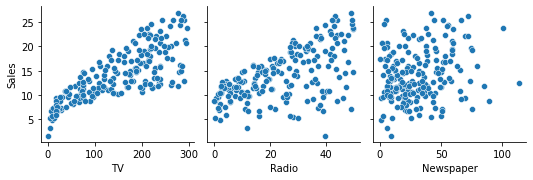

In [10]:
#Pairwise data visualization
sns.pairplot(advertising , x_vars=['TV','Radio','Newspaper'], y_vars='Sales',kind ='scatter')

In [11]:
# Here tv seems to be like a good feature for good sales

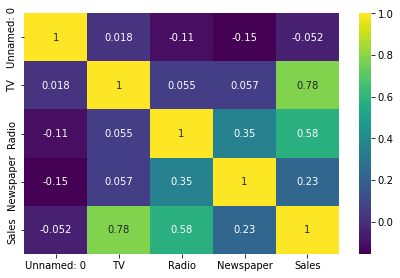

In [14]:
#Correlation between features and sales
sns.heatmap(advertising.corr(),cmap='viridis',annot=True)
plt.tight_layout()
plt.show()

In [15]:
#Correlation between feature and feature must be low 
#correlation between feature and target should be high

#we can avoid newspaper as a feature

# FOR TV ONLY AS A FEATURE

In [16]:
X = advertising['TV']
y = advertising['Sales']

In [17]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split #Import train test split
X_train_tv,X_test_tv,y_train_tv,y_test_tv = train_test_split(X,y,test_size=0.3,random_state=5)

In [18]:
#Training feature
X_train_tv  #First column is index number , second column are tv cost values

170     50.0
182     56.2
59     210.7
185    205.0
12      23.8
       ...  
73     129.4
144     96.2
118    125.7
189     18.7
99     135.2
Name: TV, Length: 140, dtype: float64

In [20]:
#ADDING A CONSTANT TO GET AN INTERCEPT
X_train_tv_sm = sm.add_constant(X_train_tv)

In [21]:
#FITTING OUR TRAINING DATA ON A REGRESSION MODEL USING OLS
lr = sm.OLS(y_train_tv,X_train_tv_sm).fit()

In [22]:
lr.params

const    6.745302
TV       0.050244
dtype: float64

In [23]:
#Here slope(m) is 0.050244
# Here constant(c) is 6.745302

In [24]:
#Summary of model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     246.6
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           1.64e-32
Time:                        15:38:56   Log-Likelihood:                -363.07
No. Observations:                 140   AIC:                             730.1
Df Residuals:                     138   BIC:                             736.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7453      0.535     12.605      0.000       5.687       7.803
TV             0.0502      0.003     15.702      0.000       0.044       0.057
==============================================================================
Omnibus:                        1.031   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.973
Skew:                          -0.201   Prob(JB):                        0.615
Kurtosis:                       2.932   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# R-SQUARE IS 0.641
# ADJUSTED R-SQUARE IS 0.639

#MODEL IS NOT DEPLOYABLE

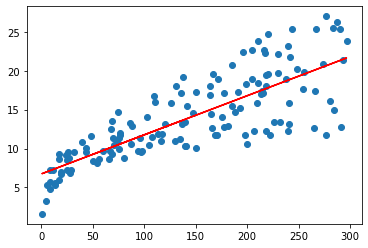

In [28]:
#VISUALIZING THE BEST FIT LINE
plt.scatter(X_train_tv,y_train_tv)
plt.plot(X_train_tv,6.745302 + 0.050244*X_train_tv,'r')
plt.show()

In [29]:
# ERROR ANALYSIS

y_train_tv_pred = lr.predict(X_train_tv_sm) #Predicted values on training X

res_tv = (y_train_tv - y_train_tv_pred) # Residual = actual - predicted

<AxesSubplot:ylabel='Density'>

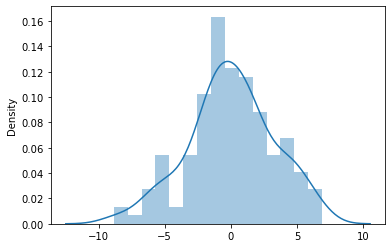

In [38]:
# PLOTTING THE HISTOGRAM OF ERRORS

sns.distplot(res_tv,bins=15)

In [31]:
# MORE ERRORS AE AROUND ZERO - THIS MIGHT BE A GOOD MODEL

In [32]:
#FINDING THE MODEL QUALITY ON TESTING DATA NOW

In [33]:
X_test_tv_sm = sm.add_constant(X_test_tv)

In [34]:
#Predicting for testing data
y_test_tv_pred = lr.predict(X_test_tv_sm)

In [35]:
#Residuals
res_test_tv = (y_test_tv - y_test_tv_pred)

<AxesSubplot:ylabel='Density'>

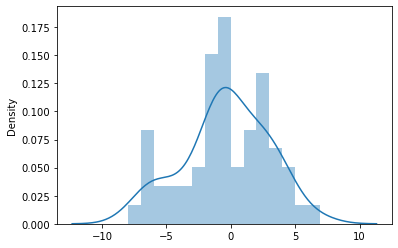

In [36]:
#PLOTTING THE ERRORS FOR TESTING SET
sns.distplot(res_test_tv,bins=15)

In [39]:
# GETTING THE VALUE OF R-SQUARE

from sklearn.metrics import r2_score

r_square = r2_score(y_test_tv , y_test_tv_pred)
print(r_square)

0.5111616978794153


In [40]:
# R-SQUARE VALUE SHOULD BE GREATER THAN 0.75 FOR THE MODEL TO BE DEPLOYABLE

## PROCESS 

- import data
- check data summary , rows, columns , correlation
- split data into training and testing set
- get intercept on training feature
- fit training data using ols using intercept x values and corresponding target values
- get c and m values
- visualize best fit line
- predict on intercept x values
- find the residuals
- find intercept x values for testing set
- predict for testing data 
- find residuals
- get R SQUARED VALUE